# Find features for electrophysiological signature of conscientiousness

In [2]:
import os
import csv
from seegnature.feature_extraction import SeparabilityIndex
from seegnature.eeg_data import Container

import pickle

Define helper method to read data from csv file into dictionary that has row numbers as keys and dictionaries as values. The dictionaries again has column names as keys and cell contents (that are identified by row number and column name) as values.

In [3]:
def read_csv_data(file):
    csv_data = {}
    f = open(file, 'r', encoding='utf-8')
    csv_file = csv.DictReader(f, delimiter='\t')

    n = 1
    for row in csv_file:
        csv_data[n] = {}
        for key in row.keys():
            csv_data[n][key] = row[key]
        n += 1
    f.close()
    return csv_data

Set working directory where all data folders are located. Every subfolder is considered as one dataset. A subfolder e.g. can stand for a single participant or a condition with eeg data from several participants.

Select channels that will be used during all following processing steps.

In [4]:
CHANNELS = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FCz', 'FC6', 'T7', 'C3', 'Cz', 'C4',
            'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']

Select path with raw data.

In [5]:
working_directory = 'L:/int_err'

In [6]:
current_path = os.path.abspath(working_directory)
raw_data_path = os.path.abspath(os.path.join(current_path, 'raw_data'))
pickle_directory = os.path.abspath(os.path.join(current_path, 'pickles'))

In [7]:
eeg_data = Container(raw_data_path, 175)

Dataset ID: aussortiert, record files: 4
Dataset ID: err_corr, record files: 44
Dataset ID: inv_corr, record files: 41
Dataset ID: stand_corr, record files: 41
Dataset ID: stand_err, record files: 37


In [8]:
group_coding_file = os.path.abspath(os.path.join(current_path, 'group_coding.txt'))
subject_data = read_csv_data(group_coding_file)

In [9]:
variables = ['Consc', 'Neuroticism', 'Extraversion', 'Consc_Group']
eeg_data.add_participant_data(subject_data, variables)

### Comparison of neuroticism and conscientiousness in erroneous responses

Saved separability diagram to L:/int_err\consc_std_err.png
Saved separability diagram to L:/int_err\neuro_std_err.png


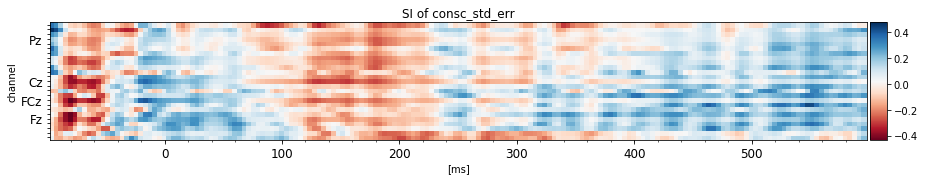

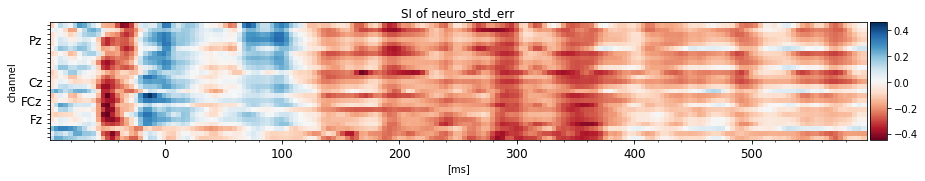

In [10]:
consc_std_err = SeparabilityIndex('consc_std_err', eeg_data.data['stand_err'], CHANNELS, 'Consc', 'pearson')
neuro_std_err = SeparabilityIndex('neuro_std_err', eeg_data.data['stand_err'], CHANNELS, 'Neuroticism', 'pearson')

consc_std_err.save_as_heatmap(working_directory)
neuro_std_err.save_as_heatmap(working_directory)

In [11]:
consc_group_std_corr = SeparabilityIndex('consc_group_std_corr', eeg_data.data['stand_corr'], CHANNELS, 'Consc_Group', 'pointbiserial')
neuro_group_std_corr = SeparabilityIndex('neuro_group_std_corr', eeg_data.data['stand_corr'], CHANNELS, 'Neuro_Group', 'pointbiserial')

consc_group_std_corr.save_as_heatmap(working_directory)
neuro_group_std_corr.save_as_heatmap(working_directory)

TypeError: cannot perform reduce with flexible type

### Comparison of neuroticism and conscientiousness in correct responses

Saved separability diagram to L:/int_err\consc_std_corr.png
Saved separability diagram to L:/int_err\neuro_std_corr.png


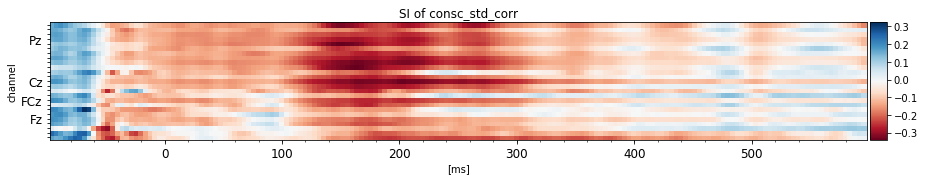

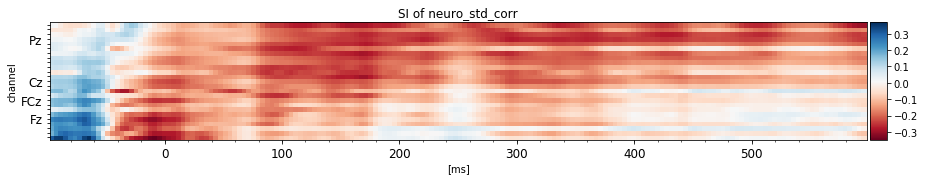

In [14]:
consc_std_corr = SeparabilityIndex('consc_std_corr', eeg_data.data['stand_corr'], CHANNELS, 'Consc', 'pearson')
neuro_std_corr = SeparabilityIndex('neuro_std_corr', eeg_data.data['stand_corr'], CHANNELS, 'Neuroticism', 'pearson')

consc_std_corr.save_as_heatmap(working_directory)
neuro_std_corr.save_as_heatmap(working_directory)

In [15]:
consc_std_corr.pickle(pickle_directory)

### Comparison of neuroticism and conscientiousness in correct (rb) responses

Saved separability diagram to L:/int_err\consc_rb_corr.png
Saved separability diagram to L:/int_err\neuro_rb_corr.png


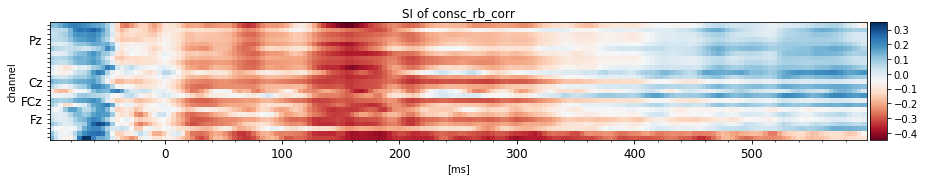

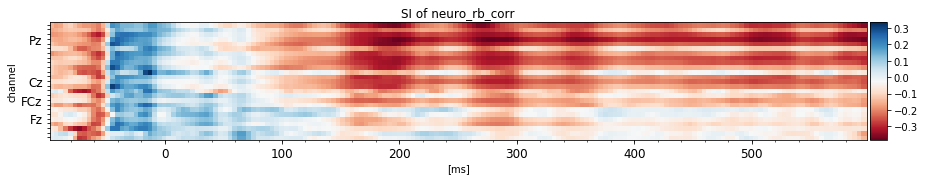

In [12]:
consc_rb_err = SeparabilityIndex('consc_rb_corr', eeg_data.data['err_corr'], CHANNELS, 'Consc', 'pearson')
neuro_rb_err = SeparabilityIndex('neuro_rb_corr', eeg_data.data['err_corr'], CHANNELS, 'Neuroticism', 'pearson')

consc_rb_err.save_as_heatmap(working_directory)
neuro_rb_err.save_as_heatmap(working_directory)

### Comparison of neuroticism and conscientiousness in correct (rc) responses

In [ ]:
consc_rc_err = SeparabilityIndex('consc_rc_corr', eeg_data.data['inv_corr'], CHANNELS, 'Consc', 'pearson')
neuro_rc_err = SeparabilityIndex('neuro_rc_corr', eeg_data.data['inv_corr'], CHANNELS, 'Neuroticism', 'pearson')

consc_rc_err.save_as_heatmap(working_directory)
neuro_rc_err.save_as_heatmap(working_directory)